In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
OriginalXpd = pd.read_csv("~/Downloads/df_prevention.csv", encoding='SHIFT-JIS', index_col=0)
OriginalX = OriginalXpd.as_matrix()
OriginalX = OriginalX.astype(float)

In [3]:
OriginalXpd.head(10)

,ACCESS2,BPMED,CHECKUP,CHOLSCREEN,COLON_SCREEN,COREM,COREW,DENTAL,MAMMOUSE,PAPTEST
Alabama,16.7,78.9,74.1,75.4,63.3,34.4,31.6,56.5,77.0,80.9
Alaska,15.1,63.7,55.1,68.8,57.5,32.4,28.8,65.8,68.9,78.3
Arizona,18.2,70.6,65.8,72.7,60.5,31.9,31.5,60.1,75.7,78.8
Arkansas,15.5,75.3,68.9,70.7,58.1,32.8,30.7,57.2,70.5,77.5
California,15.5,68.1,64.1,72.9,59.1,26.3,26.5,61.7,77.0,79.7
Colorado,14.7,68.1,60.6,72.3,62.0,37.3,32.3,64.7,70.3,80.9
Connecticut,16.9,72.1,69.7,73.7,61.8,29.8,32.1,63.8,77.9,80.8
Delaware,18.0,76.9,74.2,72.5,60.4,28.3,29.9,54.4,80.1,83.1
District of Columbia,10.0,74.7,73.9,77.2,65.9,31.0,28.1,69.1,78.0,84.3
Florida,22.1,76.3,72.1,75.9,62.3,30.0,27.8,59.3,76.0,78.6


In [4]:
OriginalX.mean(axis=0)

array([ 15.42941176,  73.83137255,  68.70784314,  72.1372549 ,
        61.85294118,  33.33333333,  31.29803922,  62.06470588,
        75.20784314,  79.72352941])

In [5]:
AutoscalingFlag = True

In [6]:
if AutoscalingFlag:
    X = (OriginalX - OriginalX.mean(axis=0)) / OriginalX.std(axis=0, ddof=1) #With autoscaling
else:
    X = OriginalX

In [7]:
NumOfClusters=3

In [8]:
KMeansResults = KMeans(n_clusters=NumOfClusters,random_state=123)
KMeansResults.fit(X)
ClusterNum = KMeansResults.labels_ + 1

In [9]:
ClusterNum

array([2, 1, 3, 3, 3, 1, 2, 2, 2, 3, 2, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 3, 1, 3, 2, 2, 2, 2, 3, 1, 1,
       2, 1, 2, 2, 3], dtype=int32)

In [10]:
pca = PCA() 
ScoreT = pca.fit(X).transform(X)

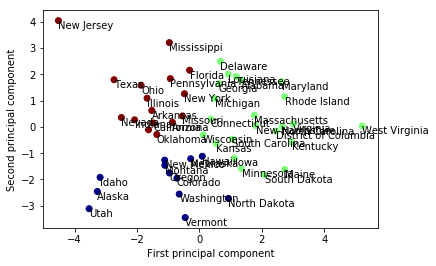

In [11]:
plt.scatter(ScoreT[:,0], ScoreT[:,1], c=ClusterNum, cmap=plt.get_cmap('jet'))
for numofsample in np.arange( 0, ScoreT.shape[0]-1):
    plt.text(ScoreT[numofsample,0], ScoreT[numofsample,1], OriginalXpd.index[numofsample], horizontalalignment='left', verticalalignment='top')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [12]:
ClusterNum1 = pd.DataFrame(ClusterNum)
ClusterNum1.index = OriginalXpd.index

In [13]:
ClusterNum1.columns =["ClusterNum"]
ClusterNum1

,ClusterNum
Alabama,2
Alaska,1
Arizona,3
Arkansas,3
California,3
Colorado,1
Connecticut,2
Delaware,2
District of Columbia,2
Florida,3
